In [ ]:
 !pip install PyWavelets

In [ ]:
import pywt

In [ ]:
 import pandas as pd
from pandas import read_csv
import numpy as np
from numpy import concatenate
import math
from math import sqrt
import random
from datetime import datetime, timedelta
import matplotlib.dates as mdates
from matplotlib import pylab as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, LSTM
from keras.optimizers import Adam

from tensorflow.keras.layers import Flatten

import joblib
from google.colab import files
import matplotlib.dates as mdates


In [ ]:
import tensorflow as tf

seed = 311
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

# To enforce determinism on operations
import os
os.environ['TF_DETERMINISTIC_OPS'] = '1'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
daily = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/SDE_driven/savè.xlsx')

discharge = daily.iloc[:1280, 0].to_numpy()
plui = daily.iloc[:1280, 1].to_numpy()
etp = daily.iloc[:1280, 2].to_numpy()

discharge1 = daily.iloc[1280:, 0].to_numpy()
plui1 = daily.iloc[1280:, 1].to_numpy()
etp1 = daily.iloc[1280:, 2].to_numpy()

In [ ]:
#Calibration data
discharge = daily.iloc[:1280, 0].to_numpy()
plui = daily.iloc[:1280, 1].to_numpy()
etp = daily.iloc[:1280, 2].to_numpy()

#Validation data
discharge1 = daily.iloc[1280:, 0].to_numpy()
plui1 = daily.iloc[1280:, 1].to_numpy()
etp1 = daily.iloc[1280:, 2].to_numpy()

In [ ]:
discharge[0]

np.float64(0.0640000030398369)

In [ ]:
#NSE, RMSE, R2
def nash_sutcliffe_efficiency(observed, simulated):
    obs_mean = np.mean(observed)
    numerator = np.sum((observed - simulated) ** 2)
    denominator = np.sum((observed - obs_mean) ** 2)

    nse = 1 - (numerator / denominator)
    return nse

def calculate_rmse(observed, predicted):

    rmse = np.sqrt(np.mean((observed - predicted)**2))
    return rmse

def calculate_r2(observed, predicted):

    mean_observed = np.mean(observed)
    mean_predicted = np.mean(predicted)

    numerator = np.sum((observed - mean_observed) * (predicted - mean_predicted))
    denominator = np.sqrt(np.sum((observed - mean_observed)**2)) * np.sqrt(np.sum((predicted - mean_predicted)**2))

    r2 = (numerator / denominator)**2
    return r2


GR6J

In [ ]:
GR6J = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/HyMoLAP/Paper/Save/GR6J_cal_save.xlsx')
GR6J_val = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/HyMoLAP/Paper/Save/GR6J_val_save.xlsx')

simGR6J = GR6J.to_numpy()
simGR6J_val = GR6J_val.to_numpy()

simGR6J = simGR6J.flatten()
simGR6J_val = simGR6J_val.flatten()

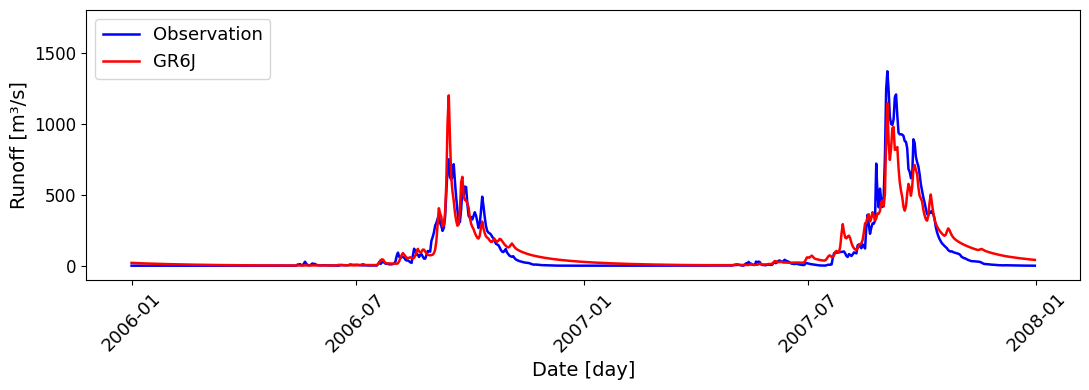

In [ ]:
import matplotlib.dates as mdates
import numpy as np
import matplotlib.pyplot as plt

# Generate dates
time1 = np.datetime64('2006-01-01')
time2 = np.datetime64('2007-12-31')
time = np.arange(time1, time2 + np.timedelta64(1, 'D'), dtype='datetime64[D]')

# Create figure and axis
fig, ax = plt.subplots(figsize=(11, 4))

# Plot observed and simulated discharge
ax.plot(time, discharge1, 'b', label='Observation', linewidth=1.8)
ax.plot(time, simGR6J_val, 'red', label='GR6J', linewidth=1.8)

# X-axis parameters (date format)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1, 7]))
plt.xticks(rotation=45, fontsize=13)
ax.set_xlabel('Date [day]', fontsize=14)

# Y-axis parameters
ax.set_ylabel('Runoff [m³/s]', fontsize=14)
ax.tick_params(axis='y', labelcolor='black', labelsize=12)
ax.set_ylim(-100, 1800)
ax.set_yticks(np.arange(0, 1800, 500))

# Add legend
ax.legend(loc='upper left', fontsize=13)

# Disable grid
ax.grid(False)

# Avoid overlaps
plt.tight_layout()

# Save figure
plt.savefig("GR6J_save.jpeg", format='jpeg', dpi=700)

#files.download('GR6J_save.jpeg')

# Show plot
plt.show()


In [ ]:
#Calibration
simGR4J = simGR6J.flatten()
print('nashe=',nash_sutcliffe_efficiency(discharge[1:], simGR4J[1:]))
print('rmse=',calculate_rmse(discharge[1:], simGR4J[1:]))
print('r2=',calculate_r2(discharge[1:], simGR4J[1:]))

nashe= 0.7796052987924641
rmse= 110.69085678078063
r2= 0.797967936337851


In [ ]:
#Validation
simGR4J_val = simGR6J_val.flatten()
print('nashe=',nash_sutcliffe_efficiency(discharge1[1:], simGR4J_val[1:]))
print('rmse=',calculate_rmse(discharge1[1:], simGR4J_val[1:]))
print('r2=',calculate_r2(discharge1[1:], simGR4J_val[1:]))

nashe= 0.862147960777823
rmse= 79.08864194440767
r2= 0.876632310222414


In [ ]:
Residu =  discharge - simGR6J
Residu1 = discharge1 - simGR6J_val

In [ ]:
# Generate dates
time1 = np.datetime64('2006-01-01')
time2 = np.datetime64('2007-12-31')
time = np.arange(time1, time2 + np.timedelta64(1, 'D'), dtype='datetime64[D]')

# Create figure and axis
fig, ax = plt.subplots(figsize=(11., 3.5))

# Background color
fig.patch.set_facecolor('#f0f0f0')
ax.set_facecolor('#f0f0f0')

# Plot observed and simulated discharge
#ax.plot(time, discharge1, 'b',  label='Observation', linewidth=1.5)
ax.plot(time,Residu1, 'magenta', label='GR6J error', linewidth=1.5)

# X-axis parameters (date format)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1, 7]))
plt.xticks(rotation=45)
ax.set_xlabel('Date [day]')

# Y-axis parameters
ax.set_ylabel('Runoff [mm/day]')
ax.tick_params(axis='y', labelcolor='black')
ax.set_ylim(-500, 800)
ax.set_yticks(np.arange(-500, 800, 200))

# Add legend
ax.legend(loc='upper left')

# Show grid
# plt.grid(True)

# Avoid overlaps
plt.tight_layout()


#files.download("Cauqueness_GR4J.jpeg")

# Show plot
plt.show()


GR6J_LSTM

In [ ]:
pip install optuna

In [ ]:
# ==========================================================
# 🔧 0️⃣ Imports & general settings
# ==========================================================
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import copy
import optuna
import matplotlib.pyplot as plt
import random
import pywt

# reproducibility
SEED = 142
np.random.seed(SEED)
torch.manual_seed(SEED)
random.seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ==========================================================
# 1️⃣ Nash–Sutcliffe Efficiency
# ==========================================================
def nash_sutcliffe_efficiency(obs, sim):
    obs = np.array(obs)
    sim = np.array(sim)
    denom = np.sum((obs - np.mean(obs)) ** 2)
    if denom == 0:
        return -np.inf
    return 1 - np.sum((obs - sim) ** 2) / denom

# ==========================================================
# 2️⃣ DWT function (safe)
# ==========================================================
def apply_wavelet_safe(series, wavelet="db2", level=3):
    series = np.asarray(series)
    if len(series) == 0:
        return series
    # determine usable level
    try:
        max_level = pywt.dwt_max_level(len(series), pywt.Wavelet(wavelet).dec_len)
    except Exception:
        max_level = 0
    level_use = min(level, max_level) if max_level >= 1 else 0
    if level_use == 0:
        return series.copy()
    coeffs = pywt.wavedec(series, wavelet, level=level_use)
    coeffs[1:] = [np.zeros_like(c) for c in coeffs[1:]]  # keep only approximation
    rec = pywt.waverec(coeffs, wavelet)
    rec = np.asarray(rec)
    # crop to original length (or smallest possible)
    return rec[:len(series)]

# ==========================================================
# 3️⃣ Data + Lag features
# NOTE: do NOT apply wavelet to the target (Residu / Residu1)
# ==========================================================
def prepare_data(simGR4J, plui, etp, Residu,
                 simGR4J_val, plui1, etp1, Residu1,
                 lag=2, wavelet="db2", level=3):
    # --- harmonize lengths separately (train vs test) ---
    min_len_train = min(len(simGR4J), len(plui), len(etp), len(Residu))
    simGR4J = np.asarray(simGR4J)[:min_len_train]
    plui = np.asarray(plui)[:min_len_train]
    etp = np.asarray(etp)[:min_len_train]
    Residu = np.asarray(Residu)[:min_len_train]

    min_len_test = min(len(simGR4J_val), len(plui1), len(etp1), len(Residu1))
    simGR4J_val = np.asarray(simGR4J_val)[:min_len_test]
    plui1 = np.asarray(plui1)[:min_len_test]
    etp1 = np.asarray(etp1)[:min_len_test]
    Residu1 = np.asarray(Residu1)[:min_len_test]

    # --- apply DWT in "safe" mode if requested ---
    if wavelet is not None:
        Q_train = apply_wavelet_safe(simGR4J, wavelet, level)
        pl_train = apply_wavelet_safe(plui, wavelet, level)
        et_train = apply_wavelet_safe(etp, wavelet, level)

        Q_test = apply_wavelet_safe(simGR4J_val, wavelet, level)
        pl_test = apply_wavelet_safe(plui1, wavelet, level)
        et_test = apply_wavelet_safe(etp1, wavelet, level)
    else:
        Q_train, pl_train, et_train = simGR4J, plui, etp
        Q_test, pl_test, et_test = simGR4J_val, plui1, etp1

    # --- final cropping to ensure same lengths (train/test)
    min_len_train2 = min(len(Q_train), len(pl_train), len(et_train), len(Residu))
    Q_train = Q_train[:min_len_train2]
    pl_train = pl_train[:min_len_train2]
    et_train = et_train[:min_len_train2]
    Residu = Residu[:min_len_train2]

    min_len_test2 = min(len(Q_test), len(pl_test), len(et_test), len(Residu1))
    Q_test = Q_test[:min_len_test2]
    pl_test = pl_test[:min_len_test2]
    et_test = et_test[:min_len_test2]
    Residu1 = Residu1[:min_len_test2]

    data_train = pd.DataFrame({
        'Qsim': Q_train,
        #'plui': pl_train,
        #'etp': et_train,
        'target': Residu
    })
    data_test = pd.DataFrame({
        'Qsim': Q_test,
        #'plui': pl_test,
        #'etp': et_test,
        'target': Residu1
    })

    data = pd.concat([data_train, data_test], ignore_index=True)

    # --- create lag features if lag >= 1, otherwise keep raw variables ---
    if lag >= 1:
        for f in ['Qsim']:
            for l in range(1, lag + 1):
                data[f'{f}_lag{l}'] = data[f].shift(l)
        data = data.dropna().reset_index(drop=True)
    else:
        # lag == 0 -> keep raw columns (no shift)
        data = data.reset_index(drop=True)

    return data

# ==========================================================
# 4️⃣ Prepare train/test
# ==========================================================
def Make_tidydata_for_lstm_once(data_df, train_size=1280):
    df = data_df.copy().reset_index(drop=True)
    if train_size >= len(df):
        raise ValueError("train_size too large for the dataset size.")

    train_df = df.iloc[:train_size].copy().reset_index(drop=True)
    val_df = df.iloc[train_size:].copy().reset_index(drop=True)

    # if lag columns exist, take them; otherwise take raw variables
    X_cols = ['Qsim']
    y_col = 'target'

    train_df['target_orig'] = train_df[y_col].values
    val_df['target_orig'] = val_df[y_col].values

    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    # fit on non-empty arrays
    scaler_X.fit(train_df[X_cols].values)
    scaler_y.fit(train_df[[y_col]].values)

    train_df[X_cols] = scaler_X.transform(train_df[X_cols].values)
    val_df[X_cols] = scaler_X.transform(val_df[X_cols].values)
    train_df[[y_col]] = scaler_y.transform(train_df[[y_col]].values)
    val_df[[y_col]] = scaler_y.transform(val_df[[y_col]].values)

    return train_df, val_df, scaler_X, scaler_y, X_cols

# ==========================================================
# 5️⃣ DataLoader
# ==========================================================
def data_loading_from_df(df, X_cols, y_col='target', batch_size=None, shuffle=False):
    X = torch.tensor(df[X_cols].values.astype(np.float32)).unsqueeze(1)
    y = torch.tensor(df[y_col].values.astype(np.float32)).unsqueeze(1)
    dataset = TensorDataset(X, y)
    if batch_size is None:
        batch_size = len(dataset)
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

# ==========================================================
# 6️⃣ LSTM model
# ==========================================================
class SimpleLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim=64):
        super(SimpleLSTM, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)
    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])

# ==========================================================
# 7️⃣ Predictions helper
# ==========================================================
def predict_all(model, loader):
    model.eval()
    preds, trues = [], []
    with torch.no_grad():
        for Xb, yb in loader:
            Xb = Xb.to(device)
            out = model(Xb).cpu().numpy().flatten()
            preds.extend(out)
            trues.extend(yb.numpy().flatten())
    return np.array(preds), np.array(trues)

# ==========================================================
# 8️⃣ Model training
# ==========================================================
def train_test_loop_from_dfs(train_df, val_df, scaler_y, X_cols,
                             epochs=200, hidden_dim=64, lr=1e-3, batch_size=None):
    train_loader = data_loading_from_df(train_df, X_cols, batch_size=batch_size, shuffle=True)
    val_loader = data_loading_from_df(val_df, X_cols, batch_size=batch_size, shuffle=False)

    model = SimpleLSTM(input_dim=len(X_cols), hidden_dim=hidden_dim).to(device)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    best_val_nse = -np.inf
    best_state = None

    for _ in range(epochs):
        model.train()
        for Xb, yb in train_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            optimizer.zero_grad()
            loss = criterion(model(Xb), yb)
            loss.backward()
            optimizer.step()

        y_val_pred_s, y_val_true_s = predict_all(model, val_loader)
        if len(y_val_pred_s) == 0:
            continue
        y_val_pred = scaler_y.inverse_transform(y_val_pred_s.reshape(-1, 1)).flatten()
        y_val_true = scaler_y.inverse_transform(y_val_true_s.reshape(-1, 1)).flatten()
        nse_val = nash_sutcliffe_efficiency(y_val_true, y_val_pred)

        if nse_val > best_val_nse:
            best_val_nse = nse_val
            best_state = copy.deepcopy(model.state_dict())

    model.load_state_dict(best_state)
    return model, best_val_nse

# ==========================================================
# 9️⃣ Wavelet + Optuna loop
# ==========================================================
wavelets = ["db2"]
levels = [5]
lag = 0           # <-- use lag=0
TRAIN_SIZE = 1280

best_global_val = -np.inf
best_wave, best_level, best_params = None, None, None
res_pred_train, res_pred_test = None, None

for wave in wavelets:
    for lev in levels:
        print(f"\n🌊 Wavelet={wave}, Level={lev}")
        data = prepare_data(simGR4J, plui, etp, Residu,
                            simGR4J_val, plui1, etp1, Residu1,
                            lag=lag, wavelet=wave, level=lev)

        train_df, val_df, scaler_X, scaler_y, X_cols = Make_tidydata_for_lstm_once(data, train_size=TRAIN_SIZE)

        best_model_state_global = None
        best_val_global = -np.inf
        best_params_global = None

        def objective(trial):
            global best_model_state_global, best_val_global, best_params_global
            hidden = trial.suggest_categorical("hidden_dim", [16, 32, 64, 128, 256, 512])
            lr = trial.suggest_categorical("lr", [1e-3, 1e-2])
            epochs = trial.suggest_categorical("epochs", list(range(100,700,50)))
            batch = trial.suggest_categorical("batch_size", [4,8,16, 32, 64, 128])

            model, nse_val = train_test_loop_from_dfs(train_df, val_df, scaler_y, X_cols,
                                                      epochs=epochs, hidden_dim=hidden, lr=lr, batch_size=batch)
            if nse_val > best_val_global:
                best_val_global = nse_val
                best_model_state_global = copy.deepcopy(model.state_dict())
                best_params_global = {"hidden_dim": hidden, "lr": lr, "epochs": epochs, "batch_size": batch}
            return nse_val

        study = optuna.create_study(direction="maximize")
        study.optimize(objective, n_trials=30)

        print(f"✅ Wavelet={wave}, Level={lev} → NSE_val={best_val_global:.4f}")

        if best_val_global > best_global_val:
            best_global_val = best_val_global
            best_wave = wave
            best_level = lev
            best_params = best_params_global
            best_model_state_final = copy.deepcopy(best_model_state_global)
            best_scaler_y = copy.deepcopy(scaler_y)
            best_train_df = train_df.copy()
            best_val_df = val_df.copy()
            best_X_cols = X_cols

print("\n🏆 BEST overall configuration:")
print(f"Wavelet={best_wave}, Level={best_level}, Params={best_params}, NSE_val={best_global_val:.4f}")

# ==========================================================
# 🔟 Final predictions
# ==========================================================
best_model = SimpleLSTM(
    input_dim=len(best_X_cols),
    hidden_dim=best_params["hidden_dim"]
).to(device)

best_model.load_state_dict(best_model_state_final)
best_model.eval()

train_loader_best = data_loading_from_df(best_train_df, best_X_cols, batch_size=len(best_train_df))
val_loader_best = data_loading_from_df(best_val_df, best_X_cols, batch_size=len(best_val_df))

y_train_pred_s, y_train_true_s = predict_all(best_model, train_loader_best)
y_val_pred_s, y_val_true_s = predict_all(best_model, val_loader_best)

y_train_pred = best_scaler_y.inverse_transform(y_train_pred_s.reshape(-1, 1)).flatten()
y_train_true = best_scaler_y.inverse_transform(y_train_true_s.reshape(-1, 1)).flatten()
y_val_pred = best_scaler_y.inverse_transform(y_val_pred_s.reshape(-1, 1)).flatten()
y_val_true = best_scaler_y.inverse_transform(y_val_true_s.reshape(-1, 1)).flatten()

nse_train_final = nash_sutcliffe_efficiency(y_train_true, y_train_pred)
nse_val_final = nash_sutcliffe_efficiency(y_val_true, y_val_pred)

res_pred_train = pd.DataFrame({"obs": y_train_true, "pred": y_train_pred})
res_pred_test = pd.DataFrame({"obs": y_val_true, "pred": y_val_pred})

print("\n✅ Best series saved in res_pred_train and res_pred_test")
print(f"🎯 NSE_train (final best model): {nse_train_final:.4f}")
print(f"🎯 NSE_val (final best model): {nse_val_final:.4f}")
print(f"🏆 Confirmed best config: Wavelet={best_wave}, Level={best_level}, Params={best_params}")


[I 2025-11-20 16:25:41,941] A new study created in memory with name: no-name-f2fec7f6-d9ca-4fdd-bd38-24cc2bd98b77



🌊 Wavelet=db2, Level=5


[I 2025-11-20 16:26:30,528] Trial 0 finished with value: 0.3077586889266968 and parameters: {'hidden_dim': 16, 'lr': 0.001, 'epochs': 250, 'batch_size': 32}. Best is trial 0 with value: 0.3077586889266968.
[I 2025-11-20 16:50:42,730] Trial 1 finished with value: 0.32694369554519653 and parameters: {'hidden_dim': 256, 'lr': 0.001, 'epochs': 600, 'batch_size': 4}. Best is trial 1 with value: 0.32694369554519653.
[I 2025-11-20 16:51:49,929] Trial 2 finished with value: 0.31262242794036865 and parameters: {'hidden_dim': 256, 'lr': 0.001, 'epochs': 100, 'batch_size': 16}. Best is trial 1 with value: 0.32694369554519653.
[I 2025-11-20 16:52:17,531] Trial 3 finished with value: 0.3424683213233948 and parameters: {'hidden_dim': 16, 'lr': 0.01, 'epochs': 250, 'batch_size': 32}. Best is trial 3 with value: 0.3424683213233948.
[I 2025-11-20 16:53:50,217] Trial 4 finished with value: 0.30760467052459717 and parameters: {'hidden_dim': 512, 'lr': 0.001, 'epochs': 200, 'batch_size': 128}. Best is tri

✅ Wavelet=db2, Level=5 → NSE_val=0.5017

🏆 BEST overall configuration:
Wavelet=db2, Level=5, Params={'hidden_dim': 128, 'lr': 0.01, 'epochs': 650, 'batch_size': 4}, NSE_val=0.5017

✅ Meilleures séries enregistrées dans res_pred_train et res_pred_test
🎯 NSE_train (final best model): 0.1989
🎯 NSE_val (final best model): 0.5017
🏆 Confirmed best config: Wavelet=db2, Level=5, Params={'hidden_dim': 128, 'lr': 0.01, 'epochs': 650, 'batch_size': 4}


In [ ]:
# Validation Performance evaluation

nse_value = nash_sutcliffe_efficiency(Residu1, res_pred_test['pred'].values)
print("Nash-Sutcliffe Efficiency (NSE):", nse_value)

rmse = calculate_rmse(Residu1, res_pred_test['pred'].values)
print('RMSE =', rmse)

r2 = calculate_r2(Residu1, res_pred_test['pred'].values)
print('R² =', r2)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Generate dates
time1 = np.datetime64('2006-01-01')
time2 = np.datetime64('2007-12-31')
time = np.arange(time1, time2 + np.timedelta64(1, 'D'), dtype='datetime64[D]')

# Create figure and axis
fig, ax = plt.subplots(figsize=(7, 5))

# Plot observed and simulated discharge
ax.plot(time, Residu1, color='b', alpha=0.5, label=r"$\mathrm{Res}^{\mathrm{GR6J}}$", linewidth=2)
ax.plot(time, res_pred_test['pred'].values, color='red', alpha=0.8, label='Prediction (WKAN)', linewidth=2)

# Annotation
plt.text(0.02, 0.95, f"NSE = {0.22}\nRMSE = {69.72} m³/s",
         transform=plt.gca().transAxes, fontsize=13,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.85))

# X-axis parameters (date format)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1, 7]))
plt.xticks(rotation=45, fontsize=12)
ax.set_xlabel('Date [day]', fontsize=14)

# Y-axis parameters
ax.set_ylabel('Residual error [m³/s]', fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.set_ylim(-600, 600)
ax.set_yticks(np.arange(-600, 601, 200))

# Add legend
#ax.legend(fontsize=13)

# Remove grid
ax.grid(False)

# Avoid overlaps
plt.tight_layout()

# Save figure
plt.savefig("Res_KAN.jpeg", format='jpeg', dpi=700)

# Télécharger le fichier dans Google Colab
from google.colab import files
#files.download('Res_KAN.jpeg')

# Show plot
plt.show()


In [ ]:
# Plot
plt.figure(figsize=(7, 5))
plt.hist(Residu1, bins=30, alpha=0.5, label=r"$\mathrm{Res}^{\mathrm{GR6J}}$", color='b')
plt.hist(res_pred_test['pred'].values, bins=30, alpha=0.8, label='Predicted (WLSTM)', color='green')

# Labels
plt.xlabel('Residual error [m³/s]', fontsize=14)
plt.ylabel('Frequency', fontsize=14)


plt.legend(loc='upper left', fontsize=13)
plt.grid(False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

# Save figure
plt.savefig("His_WLSTM_save.jpeg", format='jpeg', dpi=700)
#files.download('His_WLSTM_save.jpeg')

plt.show()


In [ ]:
final_pred = simGR6J + res_pred_train['pred'].values
final_pred1 = simGR6J_val +res_pred_test['pred'].values

In [ ]:
# Training Performance evaluation

nse_value = nash_sutcliffe_efficiency(discharge, final_pred)
print("Nash-Sutcliffe Efficiency (NSE):", nse_value)

rmse = calculate_rmse(discharge, final_pred)
print('RMSE =', rmse)

r2 = calculate_r2(discharge, final_pred )
print('R² =', r2)

In [ ]:
# Validation Performance evaluation

nse_value = nash_sutcliffe_efficiency(discharge1, final_pred1)
print("Nash-Sutcliffe Efficiency (NSE):", nse_value)

rmse = calculate_rmse(discharge1, final_pred1)
print('RMSE =', rmse)

r2 = calculate_r2(discharge1, final_pred1)
print('R² =', r2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

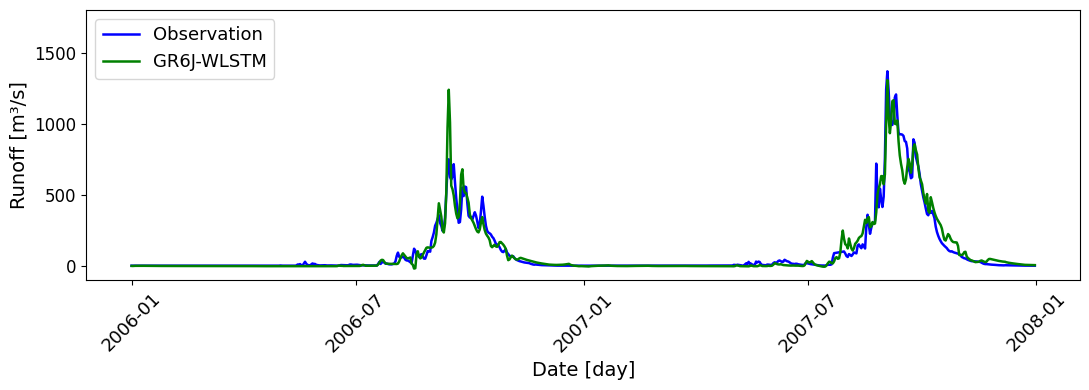

In [ ]:
import matplotlib.dates as mdates
import numpy as np
import matplotlib.pyplot as plt

# Generate dates
time1 = np.datetime64('2006-01-01')
time2 = np.datetime64('2007-12-31')
time = np.arange(time1, time2 + np.timedelta64(1, 'D'), dtype='datetime64[D]')

# Create figure and axis
fig, ax = plt.subplots(figsize=(11, 4))

# Plot observed and simulated discharge
ax.plot(time, discharge1, 'b', label='Observation', linewidth=1.8)
ax.plot(time, final_pred1, 'green', label='GR6J-WLSTM', linewidth=1.8)

# X-axis parameters (date format)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1, 7]))
plt.xticks(rotation=45, fontsize=13)
ax.set_xlabel('Date [day]', fontsize=14)

# Y-axis parameters
ax.set_ylabel('Runoff [m³/s]', fontsize=14)
ax.tick_params(axis='y', labelcolor='black', labelsize=12)
ax.set_ylim(-100, 1800)
ax.set_yticks(np.arange(0, 1800, 500))

# Add legend
ax.legend(loc='upper left', fontsize=13)

# Disable grid
ax.grid(False)

# Avoid overlaps
plt.tight_layout()

# Save figure
plt.savefig("GR6J_WLSTM_save.jpeg", format='jpeg', dpi=700)

#files.download('GR6J_WLSTM_save.jpeg')

# Show plot
plt.show()


In [ ]:
# Create a DataFrame to save the mean trajectory to an Excel file
df_mean_trajectory = pd.DataFrame({'GR6J_WLSTM_save': final_pred1})

# Save to an Excel file
df_mean_trajectory.to_excel('GR6J_WLSTM_save.xlsx', index=False)

# Download the file in Google Colab
#files.download('GR6J_WLSTM_save.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(t) GR6J_LSTM : db2, 5. NSE_res=0.507

Nash-Sutcliffe Efficiency (NSE): 0.8229420131491982
RMSE = 99.18699357374709
R² = 0.8239196530316311

Nash-Sutcliffe Efficiency (NSE): 0.932634256107961
RMSE = 55.25701861289591
R² = 0.934020926315192

(t) GR6J_LSTM_P_PET: db2, 6

Nash-Sutcliffe Efficiency (NSE): 0.8959742638588323
RMSE = 76.02691437549358
R² = 0.8961608772803279

Nash-Sutcliffe Efficiency (NSE): 0.9149097130045172
RMSE = 62.10232907507266
R² = 0.9189623724446672